In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [60]:
test_data.size

435

In [66]:
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")
pass_id = test_data['PassengerId'].head(87)
import matplotlib.pyplot as plt
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Feature Engineering
##### Creating one new column 'Family Size' and  Fare columns

In [27]:
whole_data = [train_data,test_data]
for df in whole_data:
    df['family_size'] = df['Parch'] + df['SibSp'] + 1
    df.dropna(inplace=True)
    df.loc[df.Fare <= 8.1,'Fare'] = 0
    df.loc[(df.Fare > 8.1) & (df.Fare <= 14.4) , 'Fare'] = 1
    df.loc[(df.Fare > 14.4) & (df.Fare <= 31), 'Fare'] = 2
    df.loc[(df.Fare > 31), 'Fare'] = 3
    

dtype('float64')

#### Lets map the sex column

In [30]:
for df in whole_data:
    df['Sex'] = df['Sex'].map({'female':0,'male':1})

#### Lets map the age column

In [31]:
for df in whole_data:
    df.loc[df.Age <= 16,'Age'] = 0
    df.loc[(df.Age > 16) & (df.Age <=32 ),'Age'] = 1
    df.loc[(df.Age > 32) & (df.Age <= 48),'Age'] = 2
    df.loc[(df.Age > 48) & (df.Age <= 64),'Age'] = 3
    df.loc[df.Age > 64,'Age'] = 4

#### Lets define a function for extracting the Title

In [41]:
def get_title(name):
    title = re.search('([A-Za-z]+)\.',name)
    if title:
        return title.group(1)
    return ""

for df in whole_data:
    df['Title'] = df['Name'].apply(get_title)
    df['Title'] = df['Title'].replace(['Master','Countess','Dr','Major','Col','Sir','Lady','Dona','Capt'],'Rare')
    df['Title'] = df['Title'].replace('Mlle','Miss')
    df['Title'] = df['Title'].replace('Mme','Mrs')
    #mapping titles
    df['Title'] = df['Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Rare':3})

#### Lets take a look how our data is looking now.

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,3.0,C85,C,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,3.0,C123,S,2,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,3.0,0,0,17463,3.0,E46,S,1,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,0.0,1,1,PP 9549,2.0,G6,S,3,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,3.0,0,0,113783,2.0,C103,S,1,1


In [45]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Title
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,1.0,1,0,21228,3.0,B45,S,2,2
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,2.0,1,0,W.E.P. 5734,3.0,E31,S,2,2
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,2.0,1,3,PC 17608,3.0,B57 B59 B63 B66,C,5,2
26,918,1,"Ostby, Miss. Helene Ragnhild",0,1.0,0,1,113509,3.0,B36,C,2,1
28,920,1,"Brady, Mr. John Bertram",1,2.0,0,0,113054,2.0,A21,S,1,0


### Feature Selection

In [47]:
drop_list = ['Name','SibSp','Parch','Ticket','PassengerId','Cabin','Embarked','Sex']
train_data = train_data.drop(drop_list,axis=1)
train_data.head()

,Survived,Pclass,Age,Fare,family_size,Title
1,1,1,2.0,3.0,2,2
3,1,1,2.0,3.0,2,2
6,0,1,3.0,3.0,1,0
10,1,3,0.0,2.0,3,1
11,1,1,3.0,2.0,1,1


In [48]:
test_data = test_data.drop(drop_list,axis=1)
test_data.head()

,Pclass,Age,Fare,family_size,Title
12,1,1.0,3.0,2,2
14,1,2.0,3.0,2,2
24,1,2.0,3.0,5,2
26,1,1.0,3.0,2,1
28,1,2.0,2.0,1,0


#### Lets check the correlation of the features

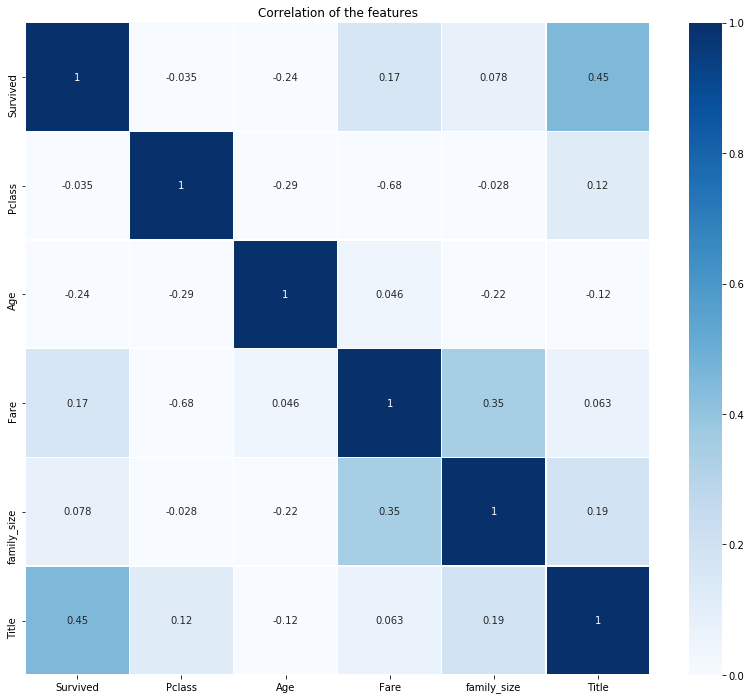

In [54]:
import seaborn as sns
plt.figure(figsize=(14,12))
plt.title("Correlation of the features")
sns.heatmap(train_data.corr(),annot=True,cmap='Blues',linewidths=0.5,vmin=0,vmax=1)





#### From the Heat Map we can observe that there is no strong correlation between the columns, every column is providing some useful and unique information. 

In [65]:
ytrain = train_data['Survived']
train_data = train_data.drop(['Survived'],axis=1)
xtrain = train_data.values
xtest = test_data.values
#xtest.head()

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
predict_val_train = model.predict(xtrain)
err_train = mean_absolute_error(ytrain,predict_val_train)
err_train


0.19621893740746202

In [62]:
len(xtest)

87

In [61]:
predict_val_test = model.predict(xtest)
len(predict_val_test)

87

In [67]:

mySubmission = pd.DataFrame({ 'PassengerId': pass_id,'Survived': predict_val_test })
mySubmission.to_csv("mySubmission.csv", index=False)